# Network IO Preprocessing

In [25]:
from pandas import DataFrame
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot

set_option('display.max_columns', 50)

In [26]:
df = read_csv('networkio.csv', header=0)
df.head()

,@timestamp,system.network.in.bytes,system.network.in.packets,system.network.in.dropped,system.network.out.bytes,system.network.out.packets,system.network.out.errors
0,"October 10th 2018, 21:31:26.146",392.156GB,"750,087,529","234,946",380.131GB,"787,496,750","430,420"
1,"October 10th 2018, 21:31:30.405",392.156GB,"750,087,589","234,946",380.131GB,"787,496,817","430,420"
2,"October 10th 2018, 21:31:36.147",392.156GB,"750,087,732","234,947",380.131GB,"787,496,974","430,420"
3,"October 10th 2018, 21:31:46.147",392.156GB,"750,087,827","234,947",380.131GB,"787,497,079","430,420"
4,"October 10th 2018, 21:31:56.147",392.156GB,"750,087,981","234,948",380.131GB,"787,497,233","430,420"


## Remove B KB MB GB

In [27]:
for i in range(1, df.shape[1]):
    selected_col = df.iloc[:, i]
    col_type = type(selected_col[0])
    
    if(col_type == str):
        df.iloc[:, i] = df.iloc[:, i].str.replace(',', '')
        
        if(selected_col.iloc[0].endswith('B') != -1):
            for index, row in DataFrame(df.iloc[:, i]).iterrows():
                if (row.values[0].find('GB') != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('GB','').replace(',',''))*1000000000
                    
                elif (row.values[0].find('MB') != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('MB','').replace(',',''))*1000000
                    
                elif (row.values[0].find('KB') != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('KB','').replace(',',''))*1000
                
                elif (row.values[0].find('B') != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('B','').replace(',',''))
        else:
            df.iloc[:, i] = df.iloc[:, i].str.astype('float')

df.head()

,@timestamp,system.network.in.bytes,system.network.in.packets,system.network.in.dropped,system.network.out.bytes,system.network.out.packets,system.network.out.errors
0,"October 10th 2018, 21:31:26.146",3.92156e+11,750087529,234946,3.80131e+11,787496750,430420
1,"October 10th 2018, 21:31:30.405",3.92156e+11,750087589,234946,3.80131e+11,787496817,430420
2,"October 10th 2018, 21:31:36.147",3.92156e+11,750087732,234947,3.80131e+11,787496974,430420
3,"October 10th 2018, 21:31:46.147",3.92156e+11,750087827,234947,3.80131e+11,787497079,430420
4,"October 10th 2018, 21:31:56.147",3.92156e+11,750087981,234948,3.80131e+11,787497233,430420


In [28]:
df.to_csv("networkio-cleaned.csv");
df = read_csv('networkio-cleaned.csv', header=0)
df.head()

,Unnamed: 0,@timestamp,system.network.in.bytes,system.network.in.packets,system.network.in.dropped,system.network.out.bytes,system.network.out.packets,system.network.out.errors
0,0,"October 10th 2018, 21:31:26.146",3.921560e+11,750087529,234946,3.801310e+11,787496750,430420
1,1,"October 10th 2018, 21:31:30.405",3.921560e+11,750087589,234946,3.801310e+11,787496817,430420
2,2,"October 10th 2018, 21:31:36.147",3.921560e+11,750087732,234947,3.801310e+11,787496974,430420
3,3,"October 10th 2018, 21:31:46.147",3.921560e+11,750087827,234947,3.801310e+11,787497079,430420
4,4,"October 10th 2018, 21:31:56.147",3.921560e+11,750087981,234948,3.801310e+11,787497233,430420


In [29]:
for i in range(3, df.shape[1]):
    selected_col = df.iloc[:, i]
    selected_col = selected_col - selected_col.shift(1)
    df[df.columns[i]] = selected_col

df

,Unnamed: 0,@timestamp,system.network.in.bytes,system.network.in.packets,system.network.in.dropped,system.network.out.bytes,system.network.out.packets,system.network.out.errors
0,0,"October 10th 2018, 21:31:26.146",3.921560e+11,NaN,NaN,NaN,NaN,NaN
1,1,"October 10th 2018, 21:31:30.405",3.921560e+11,60.0,0.0,0.0,67.0,0.0
2,2,"October 10th 2018, 21:31:36.147",3.921560e+11,143.0,1.0,0.0,157.0,0.0
3,3,"October 10th 2018, 21:31:46.147",3.921560e+11,95.0,0.0,0.0,105.0,0.0
4,4,"October 10th 2018, 21:31:56.147",3.921560e+11,154.0,1.0,0.0,154.0,0.0
5,5,"October 10th 2018, 21:32:06.147",3.921580e+11,5857.0,2.0,2000000.0,5716.0,0.0
6,6,"October 10th 2018, 21:32:16.147",3.921600e+11,11379.0,1.0,3000000.0,11351.0,0.0
7,7,"October 10th 2018, 21:32:26.147",3.921640e+11,13436.0,0.0,3000000.0,12917.0,0.0
8,8,"October 10th 2018, 21:32:30.405",3.921650e+11,5480.0,1.0,1000000.0,5312.0,1.0
9,9,"October 10th 2018, 21:32:36.147",3.921670e+11,7585.0,0.0,2000000.0,7014.0,0.0


In [30]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,@timestamp,system.network.in.bytes,system.network.in.packets,system.network.in.dropped,system.network.out.bytes,system.network.out.packets,system.network.out.errors
0,"October 10th 2018, 21:31:26.146",3.921560e+11,NaN,NaN,NaN,NaN,NaN
1,"October 10th 2018, 21:31:30.405",3.921560e+11,60.0,0.0,0.0,67.0,0.0
2,"October 10th 2018, 21:31:36.147",3.921560e+11,143.0,1.0,0.0,157.0,0.0
3,"October 10th 2018, 21:31:46.147",3.921560e+11,95.0,0.0,0.0,105.0,0.0
4,"October 10th 2018, 21:31:56.147",3.921560e+11,154.0,1.0,0.0,154.0,0.0


In [31]:
df.to_csv("networkio-cleaned.csv");

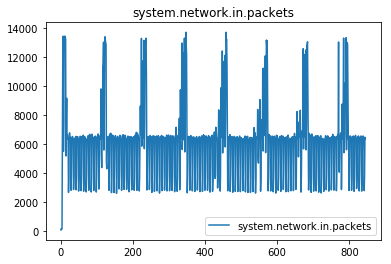

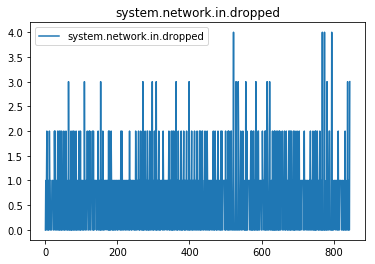

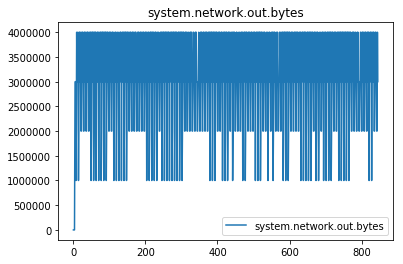

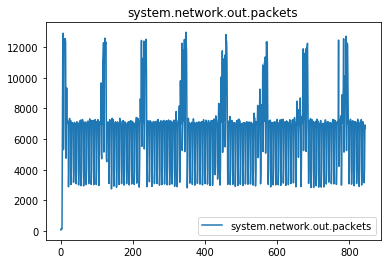

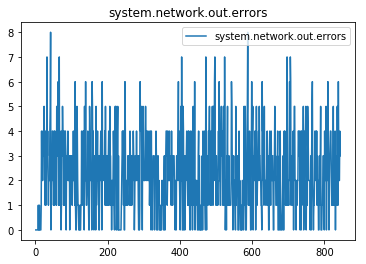

In [32]:
for i in range(2, df.shape[1]):
    pyplot.plot(df[df.columns[i]], label=df.columns[i])
    pyplot.legend()
    pyplot.title(df.columns[i])
    pyplot.show()